In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime

from mpl_toolkits.basemap import Basemap

In [2]:
dfZP = pd.read_csv('../data/train.csv')

In [3]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
dfZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

# Verificación de datos

In [5]:
dfZP.shape

(240000, 23)

In [6]:
#Verificamos datos
print(dfZP['ciudad'].unique())

['Benito Juárez' 'La Magdalena Contreras' 'Tonalá' 'Zinacantepec'
 'Zapopan' 'Coyoacán' 'Oaxaca de Juárez' 'Playa del Carmen'
 'Villa de Alvarez' 'Ixtapaluca' 'San Luis Potosí'
 'San Pedro Garza García' 'Querétaro' 'Naucalpan de Juárez' 'Monterrey'
 'Ciudad Madero' 'Cancún' 'Apodaca' 'Puebla' 'Miguel Hidalgo' 'Mérida'
 'Huixquilucan' 'Emiliano Zapata' 'Tampico' 'Atizapán de Zaragoza'
 'Tlalpan' 'Acapulco de Juárez' 'Iztacalco' 'Villahermosa'
 'Cuautitlán Izcalli' 'Irapuato' 'Epazoyucan' 'Metepec' 'Cuauhtémoc'
 'Alvaro Obregón' 'Tultitlán' 'San Pedro Cholula' 'Venustiano Carranza'
 'Coacalco de Berriozábal' 'Valle de Bravo' 'Boca del Río'
 'Tlajomulco de Zúñiga' 'León' 'San Andrés Cholula' 'Chihuahua'
 'San Nicolás de los Garza' 'Santa Catarina' 'Aguascalientes' 'Cuernavaca'
 'Xochimilco' 'Tlalnepantla de Baz' 'Tequisquiapan' 'Hermosillo'
 'Montemorelos' 'Milpa Alta' 'Gustavo A. Madero' 'Morelia' 'Tijuana'
 'Jesús María' 'Guadalajara' 'La Paz' 'Chapala' 'Cuajimalpa de Morelos'
 'Delicia

In [7]:
#Verificamos datos
print(dfZP['provincia'].unique())

['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]


In [8]:
#Verificamos que el set de datos corresponde al periodo del 1/1/2012 al 31/12/2016
dfZP['fecha'].min()

'2012-01-01 00:00:00'

In [9]:
dfZP['fecha'].max()

'2016-12-31 00:00:00'

In [10]:
dfZP['metroscubiertos'].unique()

array([ 80., 268., 144.,  63.,  95.,  75., 140., 293.,  58., 250., 100.,
       256., 170., 227., 180., 210., 127.,  nan, 133., 181., 179., 280.,
       258., 150.,  40., 120.,  88., 143., 292., 346., 300., 303., 146.,
        78.,  84.,  90., 262., 156., 160.,  68.,  98.,  47.,  57., 285.,
        79., 175., 237., 340.,  61., 167., 220., 405.,  46., 350., 381.,
       355.,  71.,  76.,  70., 122., 108., 247.,  89., 228., 396., 264.,
       367., 164., 130.,  39., 161., 216.,  83., 385., 196., 171., 141.,
       106., 254.,  86.,  55., 135., 277.,  99., 110., 115., 177., 430.,
       189., 111.,  51., 155.,  65., 225., 265.,  60., 102.,  49., 138.,
       270., 278., 131., 208., 245., 269., 154., 125., 295., 211., 188.,
       230.,  66., 310.,  19., 113., 330., 226., 233.,  96., 402.,  59.,
        54., 152., 360., 195., 173., 234.,  53., 163.,  38., 201., 193.,
       117., 400., 351., 145.,  72., 260., 139.,  62., 198., 426., 206.,
        77., 322., 417., 192.,  64., 304.,  97., 38

In [11]:
dfZP['antiguedad'].unique()

array([nan, 10.,  5.,  1.,  2.,  0., 20.,  4.,  8.,  3., 18., 16.,  6.,
       50., 30., 26., 25., 28., 15., 12., 48., 22., 11., 60., 17., 33.,
       35., 14., 40.,  7.,  9., 27., 24., 19., 34., 13., 37., 36., 65.,
       31., 21., 23., 45., 32., 51., 29., 42., 43., 49., 70., 44., 46.,
       39., 38., 47., 63., 55., 52., 41., 80., 59., 67., 54., 71., 58.,
       75., 53., 61., 79., 69., 56., 66., 57., 62., 64., 74., 77., 76.,
       68.])

In [12]:
dfZP['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [13]:
dfZP['habitaciones'].unique()

array([ 2.,  3.,  4., nan,  5.,  1.,  9.,  7., 10.,  6.,  8.])

In [14]:
dfZP['garages'].unique()

array([ 1.,  2., nan,  0.,  3.])

In [15]:
dfZP['escuelascercanas'].unique()

array([0., 1.])

In [16]:
dfZP['centroscomercialescercanos'].unique()

array([0., 1.])

In [17]:
dfZP['gimnasio'].unique()

array([0., 1.])

In [18]:
dfZP['usosmultiples'].unique()

array([0., 1.])

In [19]:
dfZP['piscina'].unique()

array([0., 1.])

## Datos faltantes 

In [20]:
nulls = pd.DataFrame(dfZP.isnull().sum().sort_values(ascending=False), columns=['nulls'])

nulls['porcentaje'] = round(100*nulls['nulls'] / len(dfZP), 2)
nulls

,nulls,porcentaje
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


## Transformacion de datos del DataFrame

In [21]:
(dfZP.memory_usage() / (1024 * 1024)).sum()

42.1143798828125

In [22]:
# Baños, habitaciones y garages Nan se setean a 0
# Antiguedad no será transformado a int y sus nulls serán tratados posteriomente para un analisis en particular
dfZP['banos'] = dfZP['banos'].fillna(0)
dfZP['habitaciones'] = dfZP['habitaciones'].fillna(0)
dfZP['garages'] = dfZP['garages'].fillna(0)
dfZP['idzona'] = dfZP['idzona'].fillna(0)

In [23]:
dfZP.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [24]:
#Transformo tipo de datos
dfZP['tipodepropiedad'] = dfZP['tipodepropiedad'].astype('category')
dfZP['direccion'] = dfZP['direccion'].astype('category')
dfZP['ciudad'] = dfZP['ciudad'].astype('category')
dfZP['provincia'] = dfZP['provincia'].astype('category')
dfZP['precio'] = dfZP['precio'].astype(int)
dfZP['banos'] = dfZP['banos'].astype(int)
dfZP['habitaciones'] = dfZP['habitaciones'].astype(int)
dfZP['garages'] = dfZP['garages'].astype(int)
dfZP['escuelascercanas'] = dfZP['escuelascercanas'].astype(int)
dfZP['centroscomercialescercanos'] = dfZP['centroscomercialescercanos'].astype(int)
dfZP['gimnasio'] = dfZP['gimnasio'].astype(int)
dfZP['usosmultiples'] = dfZP['usosmultiples'].astype(int)
dfZP['piscina'] = dfZP['piscina'].astype(int)
dfZP['idzona'] = dfZP['idzona'].astype(int)
dfZP['fecha'] = pd.to_datetime(dfZP['fecha'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
dfZP['fecha_YYYYMMDD'] = pd.to_datetime(dfZP['fecha'], format='%Y-%m-%d', errors='coerce')
dfZP['fecha_YYYY'] = pd.DatetimeIndex(dfZP['fecha']).year.astype(int)
dfZP['fecha_MM'] = pd.DatetimeIndex(dfZP['fecha']).month.astype(int)
dfZP['fecha_DD'] = pd.DatetimeIndex(dfZP['fecha']).day.astype(int)
dfZP['fecha_dayofyear'] = dfZP['fecha'].dt.dayofyear.astype('category')
dfZP['fecha_dayofweek'] = dfZP['fecha'].dt.dayofweek.astype('category')
dfZP['fecha_day_name'] = dfZP['fecha'].dt.day_name().astype('category')
dfZP['fecha_month_name'] = dfZP['fecha'].dt.month_name().astype('category')

In [25]:
dfZP.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                           category
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                           int32
garages                                int32
banos                                  int32
metroscubiertos                      float64
metrostotales                        float64
idzona                                 int32
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int32
usosmultiples                          int32
piscina                                int32
escuelascercanas                       int32
centroscomercialescercanos             int32
precio    

In [26]:
dfZP.fecha_YYYY.unique()

array([2015, 2013, 2012, 2016, 2014], dtype=int64)

In [27]:
dfZP.fecha_MM.unique()

array([ 8,  6, 10,  3,  2,  1, 12, 11,  5,  9,  7,  4], dtype=int64)

In [28]:
dfZP.fecha_day_name.unique()

[Sunday, Friday, Saturday, Tuesday, Thursday, Monday, Wednesday]
Categories (7, object): [Sunday, Friday, Saturday, Tuesday, Thursday, Monday, Wednesday]

In [29]:
dfZP.fecha_month_name.unique()

[August, June, October, March, February, ..., November, May, September, July, April]
Length: 12
Categories (12, object): [August, June, October, March, ..., May, September, July, April]

In [30]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,centroscomercialescercanos,precio,fecha_YYYYMMDD,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name,fecha_month_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2,1,...,0,2273000,2015-08-23,2015,8,23,235,6,Sunday,August
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3,2,...,1,3600000,2013-06-28,2013,6,28,179,4,Friday,June
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3,2,...,0,1200000,2015-10-17,2015,10,17,290,5,Saturday,October
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2,1,...,1,650000,2012-03-09,2012,3,9,69,4,Friday,March
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2,1,...,0,1150000,2016-06-07,2016,6,7,159,1,Tuesday,June


In [31]:
dfZP.memory_usage()

Index                             128
id                            1920000
titulo                        1920000
descripcion                   1920000
tipodepropiedad                240832
direccion                     7325032
ciudad                         527960
provincia                      241536
antiguedad                    1920000
habitaciones                   960000
garages                        960000
banos                          960000
metroscubiertos               1920000
metrostotales                 1920000
idzona                         960000
lat                           1920000
lng                           1920000
fecha                         1920000
gimnasio                       960000
usosmultiples                  960000
piscina                        960000
escuelascercanas               960000
centroscomercialescercanos     960000
precio                         960000
fecha_YYYYMMDD                1920000
fecha_YYYY                    1920000
fecha_MM    

In [32]:
(dfZP.memory_usage() / (1024 * 1024)).sum()

42.06640625

Aquí vemos que a pesar de haber agregado 8 columnas, con la transformación de datos logramos mantener el uso de memoria inicial

# PREGUNTAS GENERALES

## ¿Cual es la relación del precio con la antiguedad?

In [33]:
dfZP2 = dfZP.dropna(subset=['antiguedad']).copy()
dfZP2['antiguedad'] = dfZP2['antiguedad'].astype(int)
dfZP2['antiguedad'].unique()

array([10,  5,  1,  2,  0, 20,  4,  8,  3, 18, 16,  6, 50, 30, 26, 25, 28,
       15, 12, 48, 22, 11, 60, 17, 33, 35, 14, 40,  7,  9, 27, 24, 19, 34,
       13, 37, 36, 65, 31, 21, 23, 45, 32, 51, 29, 42, 43, 49, 70, 44, 46,
       39, 38, 47, 63, 55, 52, 41, 80, 59, 67, 54, 71, 58, 75, 53, 61, 79,
       69, 56, 66, 57, 62, 64, 74, 77, 76, 68], dtype=int64)

In [34]:
dfZP_GBy_antiguedad = dfZP2.groupby('antiguedad').agg({'precio': ['mean', 'count']})
dfZP_GBy_antiguedad.columns = ['precio_promedio', 'total_muestra']
dfZP_GBy_antiguedad['precio_promedio'] = round(dfZP_GBy_antiguedad.precio_promedio, 2)
dfZP_GBy_antiguedad

,precio_promedio,total_muestra
antiguedad,,
0,2478478.97,50335
1,2635362.52,12353
2,2790816.37,5059
3,2616412.59,5616
4,2562077.38,7944
...,...,...
75,3983333.33,6
76,10000000.00,2
77,869677.00,1


In [35]:
#Eliminamos las filas con menos de  20 muestras
dfZP_GBy_antiguedad = dfZP_GBy_antiguedad.loc[dfZP_GBy_antiguedad.total_muestra > 20] 
dfZP_GBy_antiguedad.precio_promedio.max()

4124333.33

In [36]:
dfZP_GBy_antiguedad

,precio_promedio,total_muestra
antiguedad,,
0,2478478.97,50335
1,2635362.52,12353
2,2790816.37,5059
3,2616412.59,5616
4,2562077.38,7944
5,2374731.74,33268
6,2214881.99,3169
7,2141595.38,2046
8,2050722.53,2418


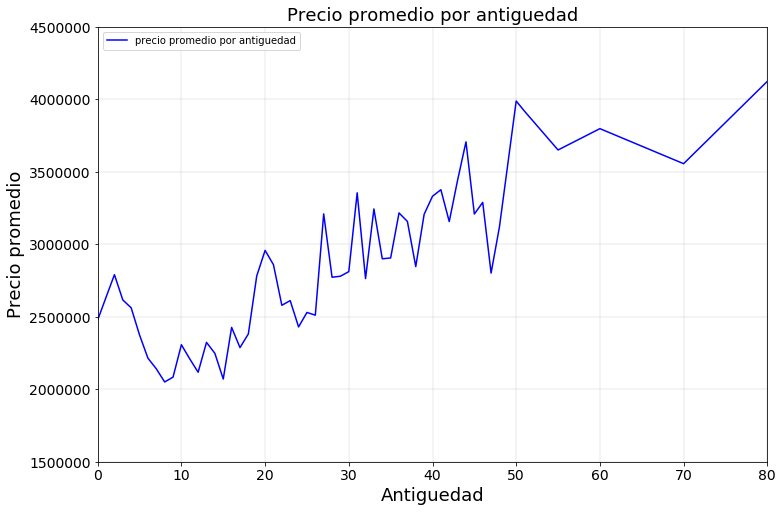

In [37]:
dfZP_GBy_antiguedad['precio_promedio'].plot(rot=0,figsize=(12,8),color='Blue', fontsize=14,x_compat=True, ylim=(1500000, 4500000))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por antiguedad',fontsize=18);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Antiguedad',fontsize=18);
plt.legend(['precio promedio por antiguedad'], loc='upper left');

plt.show()

Podemos observar una distribución pareja del precio entre las propiedades con antiguedad de 0 a 25 años, luego el promedio tiende a subir.

## ¿Cómo se distrubuyen las publicaciones por mes y año? - HEATMAP

In [38]:
for_heatmap = dfZP.pivot_table(index='fecha_YYYY', columns='fecha_MM', values='id', aggfunc='count')
for_heatmap

fecha_MM,1,2,3,4,5,6,7,8,9,10,11,12
fecha_YYYY,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329
2016,5775,4592,5022,6640,5438,6795,6013,6443,5929,6726,6086,28579


Text(105.0, 0.5, 'Año')

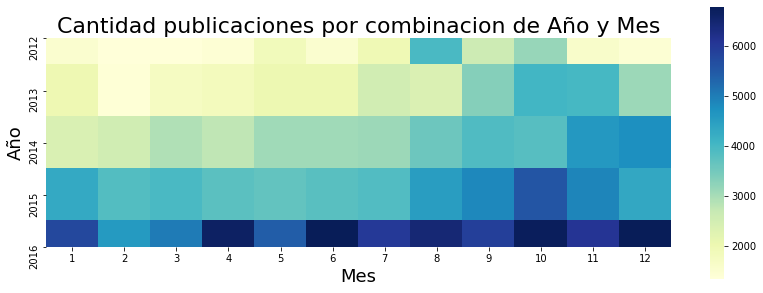

In [39]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(for_heatmap,  cmap="YlGnBu", ax=ax, robust=True, square=True)
g.set_title("Cantidad publicaciones por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

Se puede ver el crecimiento a través de los años, pero no se puede apreciar el boom de publicaciones en Dic-2016 (28579) con esta escala

Text(105.0, 0.5, 'Año')

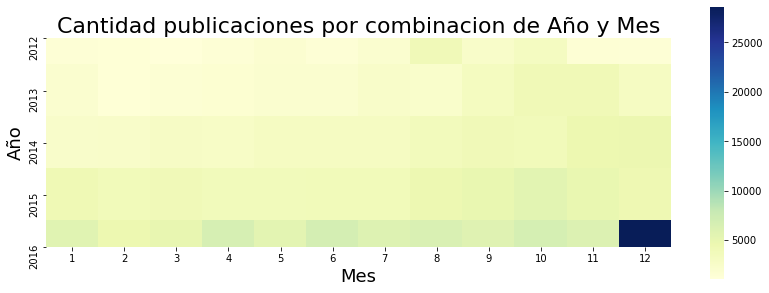

In [40]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(for_heatmap,  cmap="YlGnBu", ax=ax, square=True)
g.set_title("Cantidad publicaciones por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

No tiene sentido el grafico

## ¿Cual es la relación del precio con la cantidad de habitaciones?

In [41]:
dfZP_GBy_habitaciones = dfZP.groupby('habitaciones').agg({'precio': ['mean', 'count']})
dfZP_GBy_habitaciones.columns = ['precio_promedio', 'total_muestra']
dfZP_GBy_habitaciones['precio_promedio'] = round(dfZP_GBy_antiguedad.precio_promedio, 2)
dfZP_GBy_habitaciones

,precio_promedio,total_muestra
habitaciones,,
0,2478478.97,22471
1,2635362.52,5069
2,2790816.37,57808
3,2616412.59,121887
4,2562077.38,25068
5,2374731.74,4596
6,2214881.99,1669
7,2141595.38,539
8,2050722.53,398


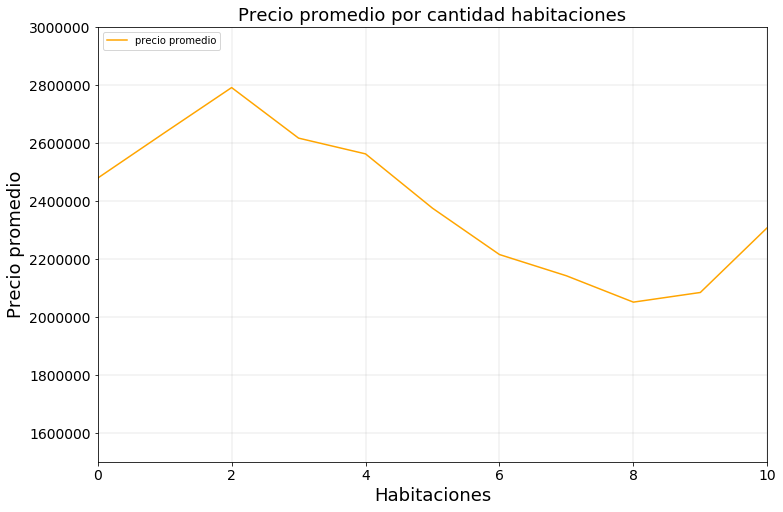

In [42]:
dfZP_GBy_habitaciones['precio_promedio'].plot(rot=0,figsize=(12,8),color='Orange', fontsize=14,x_compat=True, ylim=(1500000, 3000000))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por cantidad habitaciones',fontsize=18);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Habitaciones',fontsize=18);
plt.legend(['precio promedio'], loc='upper left');

plt.show()

## ¿Cuál es la correlación entre metros cubiertos y precios dependiendo de la cercanía con escuelas?

### ScatterPlot

Text(0, 0.5, 'Precio')

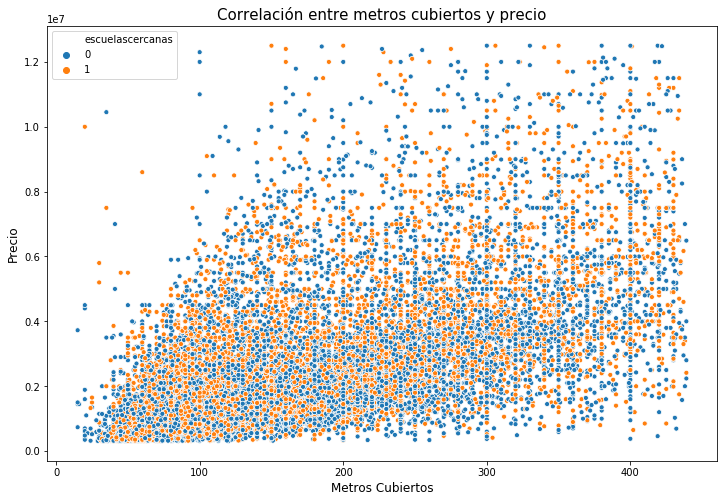

In [43]:
dfZP_escuelas_sample = dfZP.sample(frac=0.10).copy().dropna(subset=['metroscubiertos'])
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(ax=ax, x="metroscubiertos", y="precio", hue="escuelascercanas", data=dfZP_escuelas_sample, s=25)
ax.set_title("Correlación entre metros cubiertos y precio", fontsize=15)
ax.set_xlabel("Metros Cubiertos", fontsize=12)
ax.set_ylabel("Precio", fontsize=12)

In [44]:
dfZP_escuelascercanas = dfZP.dropna(subset=['metroscubiertos']).pivot_table(index='metroscubiertos', columns='escuelascercanas', values='precio', aggfunc=np.mean)
dfZP_escuelascercanas = dfZP_escuelascercanas.applymap(lambda x: round(x,2))
dfZP_escuelascercanas

escuelascercanas,0,1
metroscubiertos,,
15.0,1603807.05,1596250.00
16.0,965630.53,1371666.67
17.0,773485.00,902333.33
18.0,2247200.00,1000000.00
19.0,1002966.67,910500.00
...,...,...
435.0,5858700.00,6118861.50
436.0,5746999.98,6274851.85
437.0,5648958.29,6277329.95


### LinePlot

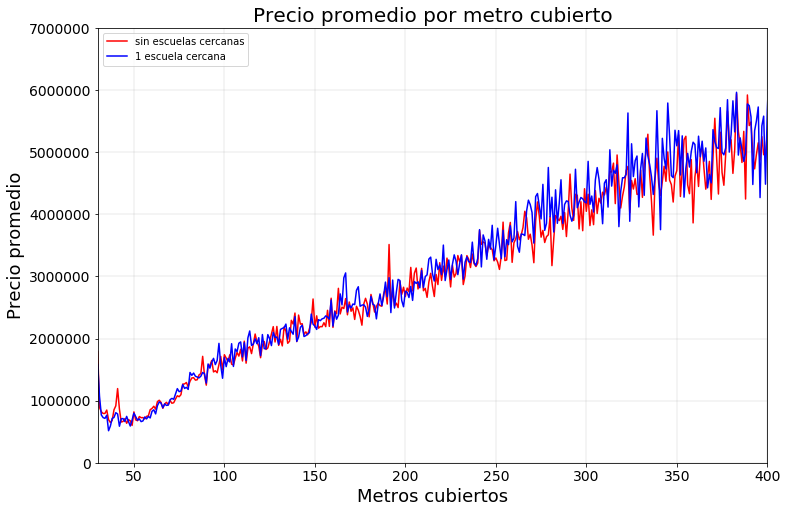

In [45]:
dfZP_escuelascercanas.plot(rot=0,figsize=(12,8),color=['Red','Blue'], fontsize=14,x_compat=True, ylim=(0, 7000000), xlim=(30, 400))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por metro cubierto',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Metros cubiertos',fontsize=18);
plt.legend(['sin escuelas cercanas', '1 escuela cercana'], loc='upper left');

plt.show()

A raiz de estos dos gráficos se ve una mínima diferencia de precio a favor de las propiedad con 1 escuela cercana lo cual no es muy significativa

##  ¿Cuál es la correlación entre metros cubiertos y precios dependiendo de la cercanía con centros comerciales?

### ScatterPlot

Text(0, 0.5, 'Precio')

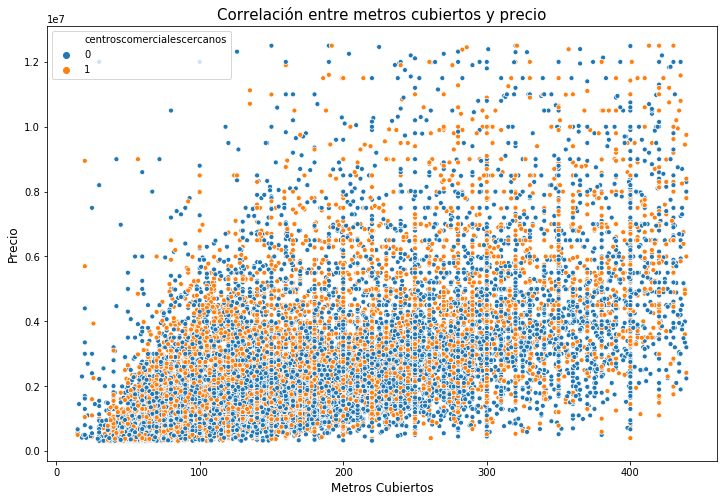

In [46]:
dfZP_centroscom_sample = dfZP.sample(frac=0.10).copy().dropna(subset=['metroscubiertos'])
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(ax=ax, x="metroscubiertos", y="precio", hue="centroscomercialescercanos", data=dfZP_centroscom_sample, s=25)
ax.set_title("Correlación entre metros cubiertos y precio", fontsize=15)
ax.set_xlabel("Metros Cubiertos", fontsize=12)
ax.set_ylabel("Precio", fontsize=12)

### LinePlot

In [47]:
dfZP_centroscomcercanos = dfZP.dropna(subset=['metroscubiertos']).pivot_table(index='metroscubiertos',columns='centroscomercialescercanos', values='precio', aggfunc=np.mean)
dfZP_centroscomcercanos = dfZP_centroscomcercanos.applymap(lambda x: round(x,2))
dfZP_centroscomcercanos

centroscomercialescercanos,0,1
metroscubiertos,,
15.0,1668274.05,1446666.67
16.0,915675.57,1445000.00
17.0,773485.00,902333.33
18.0,2102000.00,1175000.00
19.0,604560.00,1327400.00
...,...,...
435.0,5905583.33,6114266.17
436.0,5735238.08,6536105.26
437.0,5911088.50,5787773.27


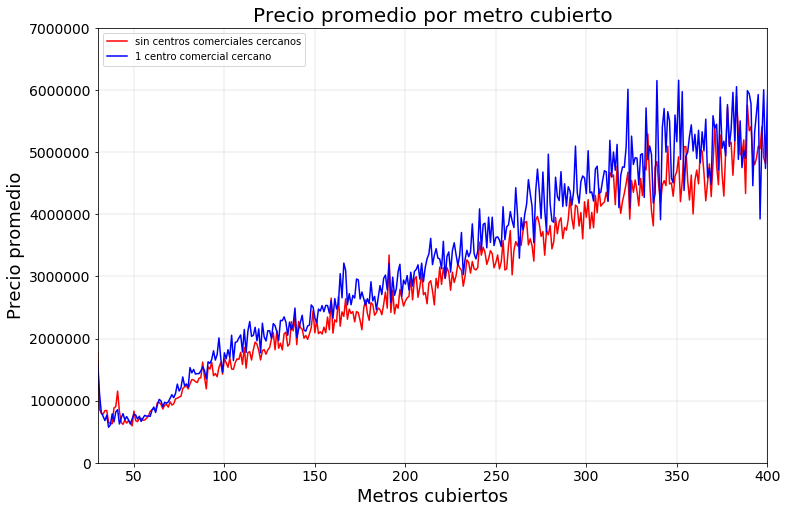

In [48]:
dfZP_centroscomcercanos.plot(rot=0,figsize=(12,8),color=['Red','Blue'], fontsize=14,x_compat=True, ylim=(0, 7000000), xlim=(30, 400))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por metro cubierto',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Metros cubiertos',fontsize=18);
plt.legend(['sin centros comerciales cercanos', '1 centro comercial cercano'], loc='upper left');

plt.show()

En este caso se puede ver un aumento significante del precio promedio para las propiedadades con 1 centro comercial cercano.

# ANALISIS DE LOS 5 TIPOS DE PROPIEDAD MAS PUBLICADOS

In [49]:
top5_tipodepropiedad = dfZP['tipodepropiedad'].value_counts().head(5)
top5_tipodepropiedad

Casa                  141717
Apartamento            57341
Casa en condominio     19297
Terreno                 9945
Local Comercial         3055
Name: tipodepropiedad, dtype: int64

In [50]:
dfZP_top5tipodepropiedad = dfZP.loc[dfZP.tipodepropiedad.isin(top5_tipodepropiedad.index)].copy()
dfZP_top5tipodepropiedad['tipodepropiedad'] = dfZP_top5tipodepropiedad['tipodepropiedad'].astype('object')
dfZP_top5tipodepropiedad['tipodepropiedad'].unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Local Comercial'], dtype=object)

## Precio según tipo de propiedad - BoxPlot

Text(0, 0.5, 'Precio')

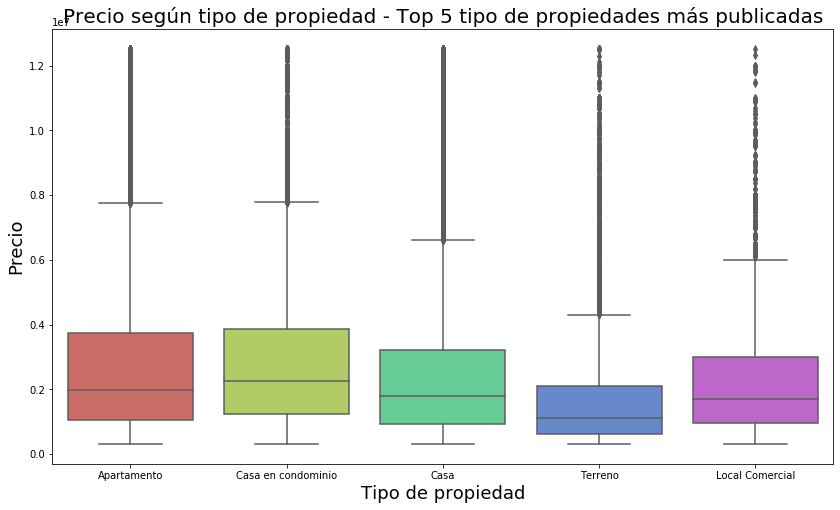

In [51]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x="tipodepropiedad", y="precio", data=dfZP_top5tipodepropiedad, palette="hls")
ax.set_title("Precio según tipo de propiedad - Top 5 tipo de propiedades más publicadas", fontsize=20)
ax.set_xlabel("Tipo de propiedad", fontsize=18)
ax.set_ylabel("Precio", fontsize=18)

## Metros cubiertos según tipo de propiedad - BoxPlot

Text(0, 0.5, 'Metros cubiertos')

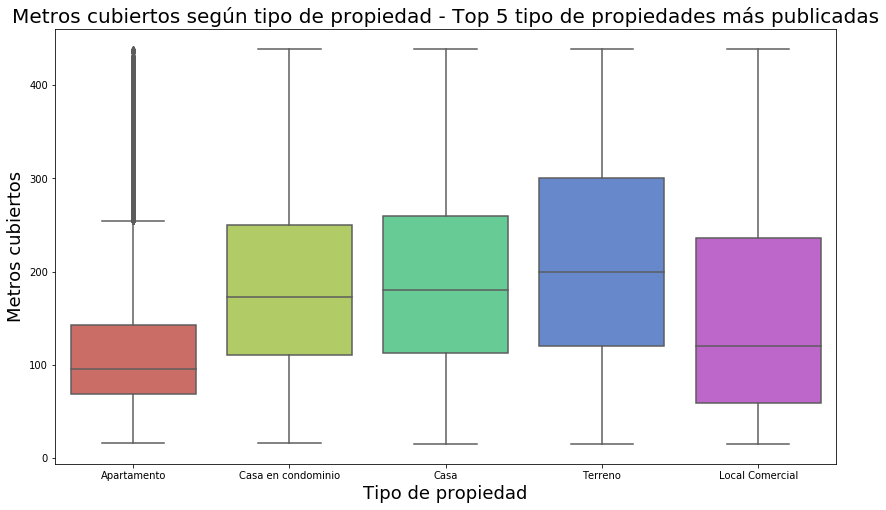

In [52]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x="tipodepropiedad", y="metroscubiertos", data=dfZP_top5tipodepropiedad, palette="hls")
ax.set_title("Metros cubiertos según tipo de propiedad - Top 5 tipo de propiedades más publicadas", fontsize=20)
ax.set_xlabel("Tipo de propiedad", fontsize=18)
ax.set_ylabel("Metros cubiertos", fontsize=18)

Podemos ver que tanto los apartamentos como los locales comerciales (tiene cotas de percentil más grande) tienen la media de metros cubiertos mas baja, en cuando a las casas en condominio y normales tienen una distrubución parecida.

## Metros totales según tipo de propiedad - BoxPlot

Text(0, 0.5, 'Metros totales')

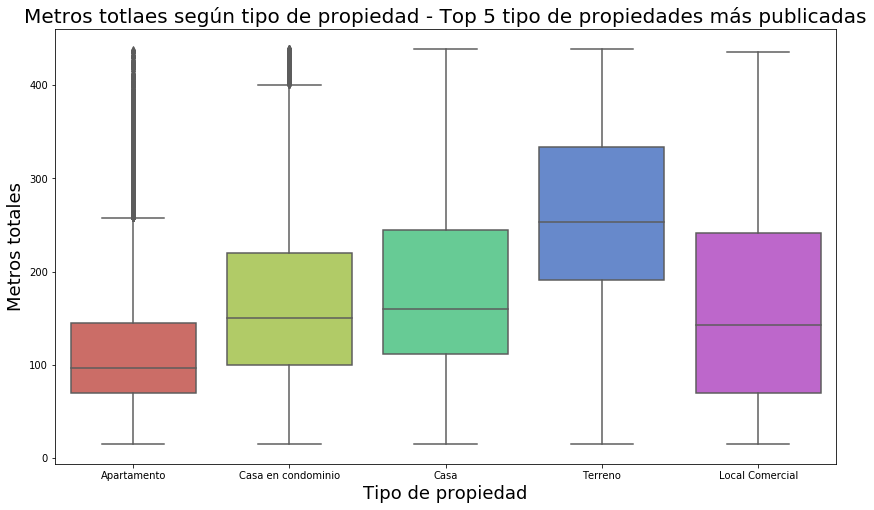

In [53]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(x="tipodepropiedad", y="metrostotales", data=dfZP_top5tipodepropiedad, palette="hls")
ax.set_title("Metros totlaes según tipo de propiedad - Top 5 tipo de propiedades más publicadas", fontsize=20)
ax.set_xlabel("Tipo de propiedad", fontsize=18)
ax.set_ylabel("Metros totales", fontsize=18)

Se puede ver como los terrenos tienen la media y cotas más altas de metros totales, mientras que las demás distrubiciones se asemejan a las del gráfico de metros cubiertos

# ANALISIS DE PRECIOS EN APARTAMENTOS

In [54]:
dfZP_apartamentos = dfZP.loc[dfZP.tipodepropiedad == 'Apartamento'].copy()

## Precio promedio por cantidad de habitaciones

In [55]:
dfZP_GBy_habitaciones = dfZP_apartamentos.groupby('habitaciones').agg({'precio': ['mean', 'count']})
dfZP_GBy_habitaciones.columns = ['precio_promedio', 'total_muestra']
dfZP_GBy_habitaciones['precio_promedio'] = round(dfZP_GBy_antiguedad.precio_promedio, 2)
dfZP_GBy_habitaciones

,precio_promedio,total_muestra
habitaciones,,
0,2478478.97,994
1,2635362.52,2841
2,2790816.37,30040
3,2616412.59,22566
4,2562077.38,780
5,2374731.74,64
6,2214881.99,23
7,2141595.38,6
8,2050722.53,13


Text(0, 0.5, 'Precio promedio')

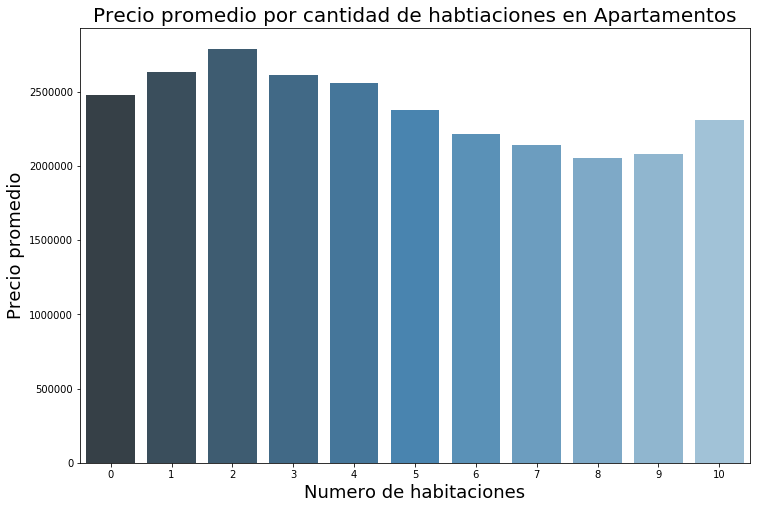

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=dfZP_GBy_habitaciones.index , y=dfZP_GBy_habitaciones['precio_promedio'], orient='v', palette="Blues_d")
ax.set_title("Precio promedio por cantidad de habtiaciones en Apartamentos", fontsize=20)
ax.set_xlabel("Numero de habitaciones", fontsize=18)
ax.set_ylabel("Precio promedio", fontsize=18)

## Precio promedio por antiguedad en Apartamentos

In [57]:
dfZP2 = dfZP_apartamentos.dropna(subset=['antiguedad']).copy()
dfZP2['antiguedad'] = dfZP2['antiguedad'].astype(int)
dfZP2['antiguedad'].unique()

array([10,  5,  1,  0, 20,  3,  4,  6, 26, 25, 48, 18, 30, 60, 17,  2, 14,
        9,  8,  7, 40, 15, 12, 11, 50, 21, 35, 45, 19, 22, 16, 29, 36, 28,
       43, 27, 13, 34, 46, 38, 32, 37, 23, 24, 33, 39, 31, 63, 41, 42, 67,
       51, 52, 80, 55, 47, 49, 44, 53, 58, 70, 75, 65, 54, 64, 59, 74, 68],
      dtype=int64)

In [58]:
dfZP_GBy_antiguedad = dfZP2.groupby('antiguedad').agg({'precio': ['mean', 'count']})
dfZP_GBy_antiguedad.columns = ['precio_promedio', 'total_muestra']
dfZP_GBy_antiguedad['precio_promedio'] = round(dfZP_GBy_antiguedad.precio_promedio, 2)

#Eliminamos las filas con menos de  20 muestras
dfZP_GBy_antiguedad = dfZP_GBy_antiguedad.loc[dfZP_GBy_antiguedad.total_muestra > 20] 
dfZP_GBy_antiguedad

,precio_promedio,total_muestra
antiguedad,,
0,3080685.37,10760
1,3316170.74,3255
2,3499709.06,1470
3,3257087.61,1553
4,3327739.31,2196
5,2926547.85,8675
6,2899290.97,763
7,2594681.86,538
8,2779938.72,499


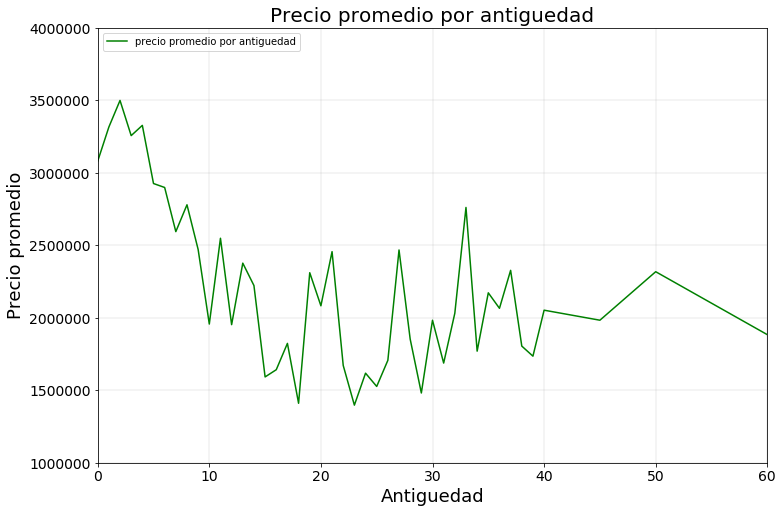

In [59]:
dfZP_GBy_antiguedad['precio_promedio'].plot(rot=0,figsize=(12,8),color='Green', fontsize=14,x_compat=True, ylim=(1000000, 4000000))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por antiguedad',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Antiguedad',fontsize=18);
plt.legend(['precio promedio por antiguedad'], loc='upper left');

plt.show()

## Precio promedio por metros cubiertos dependiendo de la cercanía con escuelas

### ScatterPlot 

[(0, 8000000)]

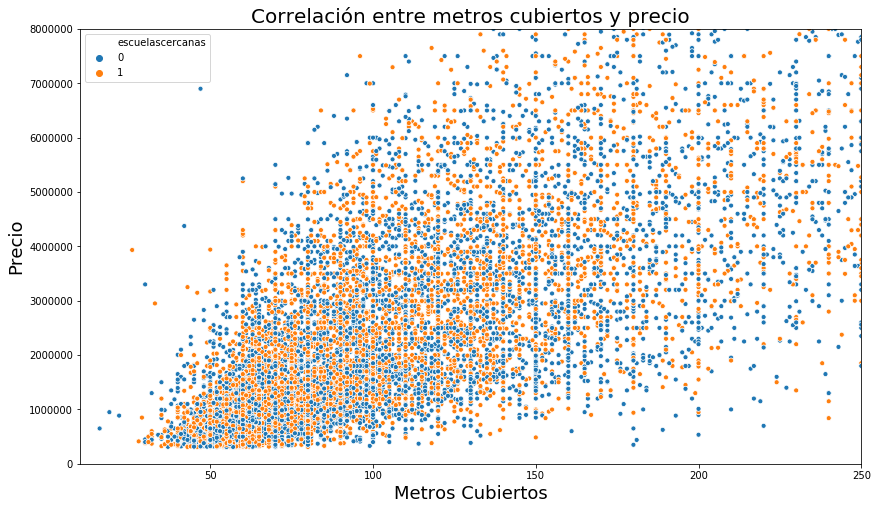

In [60]:
dfZP_escuelas_sample = dfZP_apartamentos.sample(frac=0.25).copy().dropna(subset=['metroscubiertos'])
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.scatterplot(ax=ax, x="metroscubiertos", y="precio", hue="escuelascercanas", data=dfZP_escuelas_sample, s=25)
ax.set_title("Correlación entre metros cubiertos y precio", fontsize=20)
ax.set_xlabel("Metros Cubiertos", fontsize=18)
ax.set_ylabel("Precio", fontsize=18)
ax.set(xlim=(10, 250))
ax.set(ylim=(0, 8000000))

### LinePlot

In [61]:
dfZP_escuelascercanas = dfZP_apartamentos.dropna(subset=['metroscubiertos']).pivot_table(index='metroscubiertos', columns='escuelascercanas', values='precio', aggfunc=np.mean)
dfZP_escuelascercanas = dfZP_escuelascercanas.applymap(lambda x: round(x,2))
dfZP_escuelascercanas

escuelascercanas,0,1
metroscubiertos,,
16.0,796666.67,NaN
17.0,NaN,1750000.0
19.0,693900.00,NaN
20.0,NaN,872500.0
22.0,782712.50,910000.0
...,...,...
431.0,6950000.00,NaN
435.0,NaN,8116248.8
436.0,NaN,6675000.0


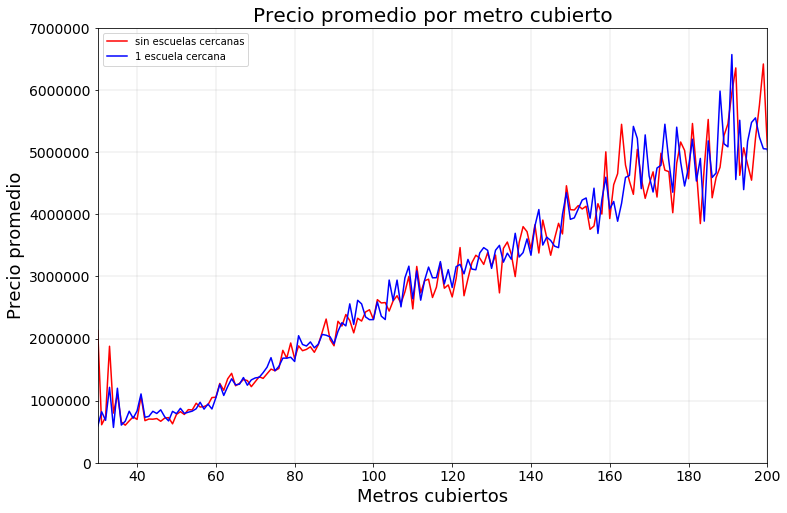

In [62]:
dfZP_escuelascercanas.plot(rot=0,figsize=(12,8),color=['Red','Blue'], fontsize=14,x_compat=True, ylim=(0, 7000000), xlim=(30, 200))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por metro cubierto',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Metros cubiertos',fontsize=18);
plt.legend(['sin escuelas cercanas', '1 escuela cercana'], loc='upper left');

plt.show()

## Precio promedio por metros cubiertos dependiendo de la cercanía con centros comerciales

### ScatterPlot

[(0, 8000000)]

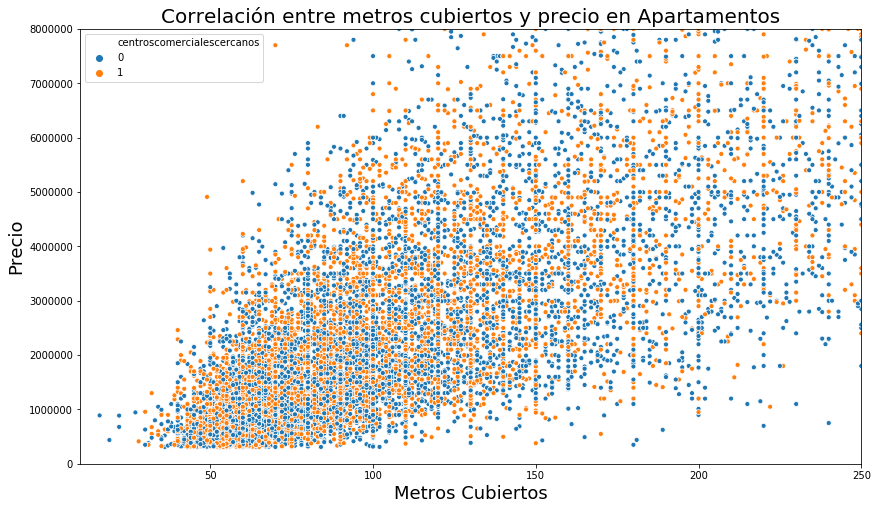

In [63]:
dfZP_escuelas_sample = dfZP_apartamentos.sample(frac=0.25).copy().dropna(subset=['metroscubiertos'])
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.scatterplot(ax=ax, x="metroscubiertos", y="precio", hue="centroscomercialescercanos", data=dfZP_escuelas_sample, s=25)
ax.set_title("Correlación entre metros cubiertos y precio en Apartamentos", fontsize=20)
ax.set_xlabel("Metros Cubiertos", fontsize=18)
ax.set_ylabel("Precio", fontsize=18)
ax.set(xlim=(10, 250))
ax.set(ylim=(0, 8000000))

### Line Plot 

In [64]:
dfZP_centroscomcercanos = dfZP_apartamentos.dropna(subset=['metroscubiertos']).pivot_table(index='metroscubiertos',columns='centroscomercialescercanos', values='precio', aggfunc=np.mean)
dfZP_centroscomcercanos = dfZP_centroscomcercanos.applymap(lambda x: round(x,2))
dfZP_centroscomcercanos

centroscomercialescercanos,0,1
metroscubiertos,,
16.0,796666.67,NaN
17.0,NaN,1750000.0
19.0,693900.00,NaN
20.0,NaN,872500.0
22.0,782712.50,910000.0
...,...,...
431.0,6950000.00,NaN
435.0,NaN,8116248.8
436.0,6675000.00,NaN


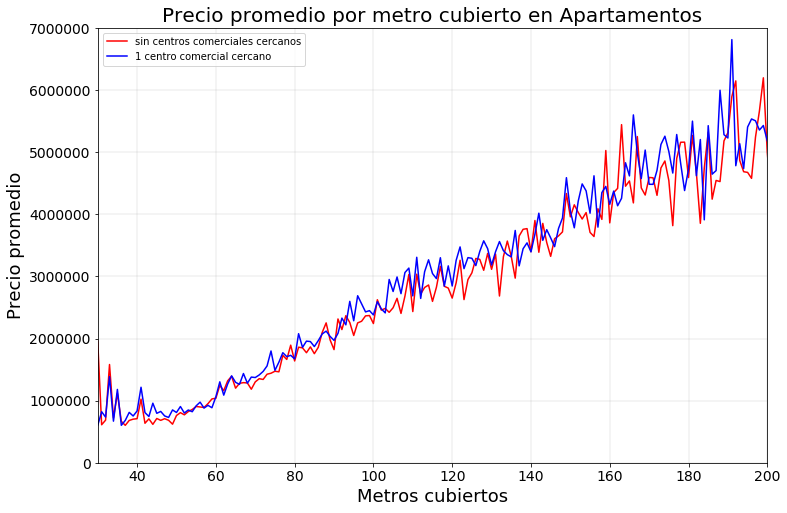

In [65]:
dfZP_centroscomcercanos.plot(rot=0,figsize=(12,8),color=['Red','Blue'], fontsize=14,x_compat=True, ylim=(0, 7000000), xlim=(30, 200))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por metro cubierto en Apartamentos',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Metros cubiertos',fontsize=18);
plt.legend(['sin centros comerciales cercanos', '1 centro comercial cercano'], loc='upper left');

plt.show()

## Precio promedio por metros cubiertos dependiendo de cercanías

In [66]:
dfZP_apartamentos['cercaniastotales'] = dfZP_apartamentos.escuelascercanas + dfZP_apartamentos.centroscomercialescercanos 
dfZP_cercanias = dfZP_apartamentos.dropna(subset=['metroscubiertos']).pivot_table(index='metroscubiertos',columns='cercaniastotales', values='precio', aggfunc=np.mean)
dfZP_cercanias = dfZP_cercanias.applymap(lambda x: round(x,2))
dfZP_cercanias

cercaniastotales,0,1,2
metroscubiertos,,,
16.0,796666.67,NaN,NaN
17.0,NaN,NaN,1750000.0
19.0,693900.00,NaN,NaN
20.0,NaN,NaN,872500.0
22.0,782712.50,NaN,910000.0
...,...,...,...
431.0,6950000.00,NaN,NaN
435.0,NaN,NaN,8116248.8
436.0,NaN,6675000.0,NaN


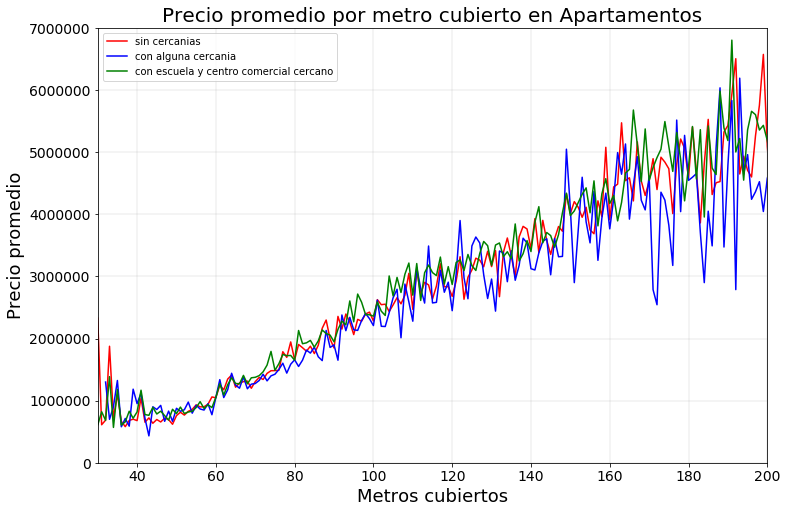

In [67]:
dfZP_cercanias.plot(rot=0,figsize=(12,8),color=['Red','Blue', 'Green'], fontsize=14,x_compat=True, ylim=(0, 7000000), xlim=(30, 200))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por metro cubierto en Apartamentos',fontsize=20);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Metros cubiertos',fontsize=18);
plt.legend(['sin cercanias', 'con alguna cercania', 'con escuela y centro comercial cercano'], loc='upper left');

plt.show()